# 1. Passive learning without random policy

We set a discount factor $\gamma = 0.95$ as we consider that future reward are very important. However, we don't set $\gamma = 0.95$ as we want to penalize state that are far from the solution

In [1]:
from environment import SimpleMaze
from agent import PassiveAgentTD

row, col = 7, 12

env = SimpleMaze(row, col)
env.render()

0  |.|.|.|.|.|.|.|.|.|.|.|E|
1  |.|.|.|.|.|.|.|.|.|.|.|.|
2  |.|.|.|.|.|.|.|.|.|.|.|.|
3  |.|.|.|.|.|.|.|.|.|.|.|.|
4  |.|.|.|.|.|.|.|.|.|.|.|.|
5  |.|.|.|.|.|.|.|.|.|.|.|.|
6  |C|.|.|.|.|.|.|.|.|.|.|.|



In [2]:
agent = PassiveAgentTD(env, 100, gamma=0.95, debug=False)
agent.learning()
agent.print_u_table()

learning completed
[6, 0]    [5, 0]    [4, 0]    [3, 0]    [2, 0]    [1, 0]    [0, 0]    [0, 1]    [0, 2]    [0, 3]    [0, 4]    [0, 5]    [0, 6]    [0, 7]    [0, 8]    [0, 9]    [0, 10]   
0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         
-0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     909.09    
-1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      718.71    984.85    
-2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     524.05    884.78    996.5     
-3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04 

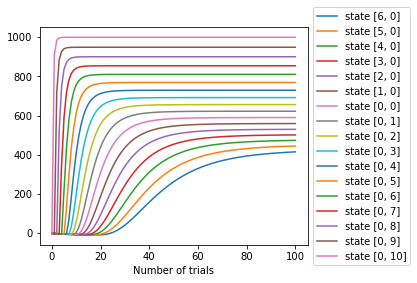

In [3]:
import matplotlib.pyplot as plt
utilities = agent.get_utilities()
visited_states = agent.get_visited_state()

fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(visited_states)):
    plt.plot(utilities[i], label="state "+str(visited_states[i]))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Number of trials")
plt.show()

In [4]:
states = agent.get_visited_state()
utilities = agent.get_utilities()
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        if [i, j] in states:
            print("{:<8}".format(str(round(utilities[states.index([i, j])][-1], 2))), end=" ")
        else:
            print("{:<8}".format(""), end=" ")
    print()

   0        1        2        3        4        5        6        7        8        9        10       11       
0  590.64   622.83   656.68   692.3    729.79   769.26   810.8    854.52   900.55   949.0    1000.0            
1  559.94                                                                                                      
2  530.53                                                                                                      
3  502.05                                                                                                      
4  473.94                                                                                                      
5  445.44                                                                                                      
6  415.6                                                                                                       


# 2. Passive learning with a random policy

In [5]:
from environment import SimpleMaze
from agent import PassiveAgentTD

row, col = 7, 12

env = SimpleMaze(row, col)
env.render()

0  |.|.|.|.|.|.|.|.|.|.|.|E|
1  |.|.|.|.|.|.|.|.|.|.|.|.|
2  |.|.|.|.|.|.|.|.|.|.|.|.|
3  |.|.|.|.|.|.|.|.|.|.|.|.|
4  |.|.|.|.|.|.|.|.|.|.|.|.|
5  |.|.|.|.|.|.|.|.|.|.|.|.|
6  |C|.|.|.|.|.|.|.|.|.|.|.|



In [6]:
agent = PassiveAgentTD(env, 500, seed=0, gamma=0.95, random_policy=True, debug=False)
agent.learning()

learning completed


In [7]:
states = agent.get_visited_state()
utilities = agent.get_utilities()
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        if [i, j] in states:
            print("{:<8}".format(str(round(utilities[states.index([i, j])][-1], 2))), end=" ")
        else:
            print("{:<8}".format(""), end=" ")
    print()

   0        1        2        3        4        5        6        7        8        9        10       11       
0  15.04    33.73    53.58    68.8     88.22    106.77   162.13   216.28   260.02   374.1    655.01   0        
1  5.78     16.66    38.68    51.95    67.73    77.95    104.15   159.88   210.55   258.03   350.76   300.56   
2  5.37     10.92    35.56    52.12    64.32    68.64    90.27    136.4    181.59   181.95   189.69   95.96    
3  4.5      10.46    20.44    40.76    58.24    60.12    83.77    121.07   104.35   136.79   120.65   71.89    
4  2.74     7.15     8.84     10.06    36.31    39.13    44.64    32.05    44.04    55.4     42.6     41.45    
5  2.71     5.13     5.11     5.94     10.19    10.82             24.59    30.33    42.09    31.41    23.7     
6  1.59     2.18     1.65     5.38     8.64     7.92              18.52    21.77    37.36    24.26    20.67    


# 3. Active learning with Q-function

In [8]:
from environment import SimpleMaze
from agent import ActiveAgentQLearning

row, col = 7, 12

env = SimpleMaze(row, col)
env.render()

0  |.|.|.|.|.|.|.|.|.|.|.|E|
1  |.|.|.|.|.|.|.|.|.|.|.|.|
2  |.|.|.|.|.|.|.|.|.|.|.|.|
3  |.|.|.|.|.|.|.|.|.|.|.|.|
4  |.|.|.|.|.|.|.|.|.|.|.|.|
5  |.|.|.|.|.|.|.|.|.|.|.|.|
6  |C|.|.|.|.|.|.|.|.|.|.|.|



In [9]:
agent = ActiveAgentQLearning(env, 200, q_min=2000, n_min=20, gamma=0.95, debug=False)
agent.learning()

learning completed


## utility for each state

In [10]:
utilities = agent.get_utilities()
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        print("{:<8}".format(str(round(utilities[i*col + j].item(), 2))), end=" ")
    print()

   0        1        2        3        4        5        6        7        8        9        10       11       
0  536.28   582.24   620.39   656.11   692.19   729.78   769.25   810.8    854.52   900.55   949.0    1000.0   
1  531.17   560.18   590.71   622.85   656.69   692.3    729.79   769.26   810.8    854.52   900.55   949.0    
2  503.61   531.17   560.18   590.71   622.85   656.69   692.3    729.79   769.26   810.8    854.52   900.55   
3  477.43   503.61   531.17   560.18   590.71   622.85   656.69   692.3    729.79   769.26   810.8    854.52   
4  452.56   477.43   503.61   531.17   560.18   590.71   622.85   656.69   692.3    729.79   769.26   810.8    
5  428.93   452.56   477.43   503.61   531.17   560.18   590.71   622.85   656.69   692.3    729.79   769.26   
6  406.48   428.93   452.56   477.43   503.61   531.17   560.18   590.71   622.85   656.69   692.3    729.79   


## State representation

In [11]:
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        print("{:<8}".format(str(i*col + j)), end=" ")
    print()

   0        1        2        3        4        5        6        7        8        9        10       11       
0  0        1        2        3        4        5        6        7        8        9        10       11       
1  12       13       14       15       16       17       18       19       20       21       22       23       
2  24       25       26       27       28       29       30       31       32       33       34       35       
3  36       37       38       39       40       41       42       43       44       45       46       47       
4  48       49       50       51       52       53       54       55       56       57       58       59       
5  60       61       62       63       64       65       66       67       68       69       70       71       
6  72       73       74       75       76       77       78       79       80       81       82       83       


# Maze environment

In [12]:
from environment import Maze

env = Maze(13, 30)
env.render()

##############################
#.#.......#.............#...##
#.#.#####.#.###.#########E#.##
#.#...#...#.#.#.#.........#.##
#.###.#.###.#.#.#.#######.#.##
#.....#.#...#.#...#.....#.#.##
#.#####.#.###.#####.###.###.##
#.#.....#.#.#...#...#.#..S#.##
#.#.#####.#.#.#.#.###.#####.##
#.#...#...#...#.#.#...#.....##
#.###.#.#######.#.#.#.#####.##
#...#...........#...#.......##
##############################
